## Navya Singh

# The True Judges of the Olympics

### 1.0 Background and Motivation
The culmination of international sports achievements, the Olympic Games play a key role in the cultural life of a global community. Originating from the Greeks, these games allow nations across the world to showcase their athletic capabilities. Through their extensive coverage, the Olympics have a considerable impact on the social and global identity of all the participating countries. There are two subcategories under the Olympics - Winter and Summer Olympics. Both of these games are held in their respective seasons every four years. These games are a means for spectators and followers of the Olympics to feel united to their national community through their patriotism. On a similar note, I have felt quite connected to my roots, despite not living in my native country, by watching these games throughout the years. Due to this reason, I was inclined towards analyzing this event for my project as it has played a significant impact on my upbringing. 	

The governing body of the Olympics, known and the IOC (International Olympic Committee), chooses judges for each sport. Moreover, the International Sports Federation supervises each sport at the global level to increase fairness and equal opportunity. Alongside this, there are certain factors like government incentives towards sports that directly affect a country's performance at the Olympics. For my project, I want to analyze the indirect agents that can increase a country's chances of winning.  In particular, I would like to answer three questions with my knowledge of Data Science and Analysis. These include:
1. Does the host country have an advantage over the other participating countries?
2. Does an equal ratio of women to men participating in the Olympics play with a country's odds?
3. Does the GDP per capita affect a country's performance?

### 2.0 Methodology

This project mainly comprises of data visualization, manipulation, and analysis. Moreover, I used computational techniques such as masking, splitting datasets, and linear regression.

In [2]:
#importing all the required modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To start off, the dataset that includes information about all the athletes that have participated in the Olympics was loaded into the notebook as a Pandas dataframe called <font color='darkblue'>all_ath</font>. This dataset contains multiple records of athletes from the years 1894 to 2020. Furthermore, each event that an athlete had participated in each year was listed as a new record in each row. This caused an overestimation while counting the number of medals a particular country won or the number of participants from a country. To avoid this, I used the drop_duplicates() method in Pandas and deleted all the records which have the same name. To give a basic rundown of the data and all the columns contained within it, I used the .head() function.

In [3]:
#loading the required datasets to Pandas Dataframes
all_ath = pd.read_csv('athlete_events.csv', delimiter=',') # information about every athlete at every Olympics game
all_ath = all_ath.drop_duplicates(subset=['Name']) # ensuring each athlete is counted once
all_ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


As one may notice, <font color='darkblue'>all_ath</font> contains the names of cities where various atheletes competed, these being the host cities. For our analysis, we will be focusing on the countries where the Olympics were hosted. To tackle this issue, I replaced all the host city names to their respective country names using the .replace() function of Pandas dataframes (Joshuaswords, 2021). The resulting dataset with the replaced country names is shown below.

In [4]:
# Changing the host city names to host country names
all_ath.replace("Rio de Janeiro", "Brazil", inplace=True)
all_ath.replace("London", "United Kingdom", inplace=True)
all_ath.replace("Beijing", "China", inplace=True)
all_ath.replace("Athina", "Greece",inplace=True)
all_ath.replace("Sydney", "Australia", inplace=True)
all_ath.replace("Melbourne", "Australia", inplace=True)
all_ath.replace("Atlanta", "United States", inplace=True)
all_ath.replace("Los Angeles", "United States",inplace=True)
all_ath.replace("St. Louis", "United States", inplace=True)
all_ath.replace("Salt Lake City", "United States", inplace=True)
all_ath.replace("Lake Placid", "United States", inplace=True)
all_ath.replace("Squaw Valley", "United States", inplace=True)
all_ath.replace("Barcelona", "Spain", inplace=True)
all_ath.replace("Seoul", "South Korea", inplace=True)
all_ath.replace("Moskva", "Russia", inplace=True)
all_ath.replace("Montreal", "Canada", inplace=True)
all_ath.replace("Calgary", "Canada", inplace=True)
all_ath.replace("Vancouver", "Canada", inplace=True)
all_ath.replace("Munich", "Germany", inplace=True)
all_ath.replace("Berlin", "Germany", inplace=True)
all_ath.replace("Garmisch-Partenkirchen", "Germany", inplace=True)
all_ath.replace("Mexico City", "Mexico", inplace=True)
all_ath.replace("Tokyo", "Japan", inplace=True)
all_ath.replace("Nagano", "Japan", inplace=True)
all_ath.replace("Sapporo", "Japan", inplace=True)
all_ath.replace("Roma", "Italy", inplace=True)
all_ath.replace("Cortina d'Ampezzo", "Italy", inplace=True)
all_ath.replace("Paris","France", inplace=True)
all_ath.replace("Grenoble", "France", inplace=True)
all_ath.replace("Vancouver", "Canada", inplace=True)
all_ath.replace("Albertville","France", inplace=True)
all_ath.replace("Chamonix", "France", inplace=True)
all_ath.replace("Helsinki", "Finland", inplace=True)
all_ath.replace("Amsterdam", "Netherlands", inplace=True)
all_ath.replace("Antwerpen","Belgium", inplace=True)
all_ath.replace("Stockholm", "Sweden", inplace=True)
all_ath.replace("Lillehammer", "Norway", inplace=True)
all_ath.replace("Oslo", "Norway", inplace=True)
all_ath.replace("Sochi", "Russia", inplace=True)
all_ath.replace("Innsbruck", "Austria", inplace=True)
all_ath.replace("Sarajevo", "Yugoslavia", inplace=True)
all_ath.replace("Sankt Moritz", "Switzerland", inplace=True)

all_ath = all_ath.rename(columns={'City':'Country'}) #renaming the 'City' column to 'Country'

all_ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Country,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Spain,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,United Kingdom,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Belgium,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,France,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Canada,Speed Skating,Speed Skating Women's 500 metres,NaN


#### 2.1 Host Country Effect
Coming over to the first question I proposed, I have imported an additional dataset found in a csv file through Pandas and named it <font color='darkblue'>olym_country</font>. This dataframe contains the list of all the host cities and their country names in the respective order of them hosting the Olympics. To evaluate the exact number of times a particular country was listed in this dataframe, i used the .groupby() function. 

In [75]:
#calculates the frequency of each country hosting the Olympics
olym_country = pd.read_csv('olympic_hosts.csv') # information about host country
times_hosted = olym_country.groupby('game_location').count() # counting the frequency of each country listed

With the help of olym_country, I plotted a bar graph that displays information about the frequency of each country hosting the games. The plotting was done with the help of Python's matplotlib library. I displayed a horizontal grid so that it would be easier to discern the exact frequency that each country represents.

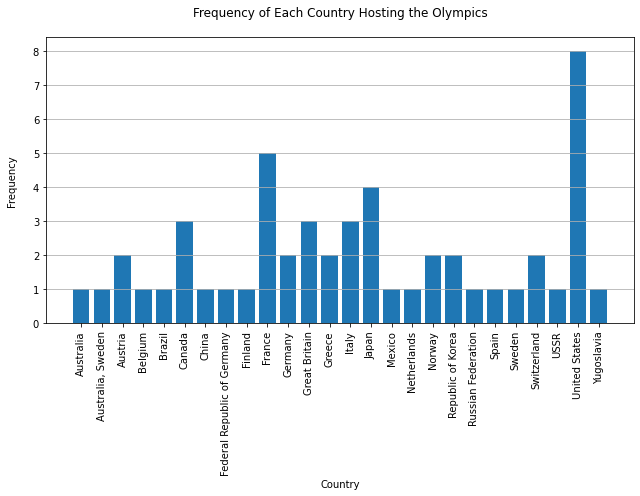

In [74]:
# plotting my results
plt.figure(figsize=(9,7))
plt.bar(times_hosted.index, times_hosted.game_name)
plt.xlabel('Country')
plt.ylabel('Frequency\n')
plt.title('Frequency of Each Country Hosting the Olympics\n')
plt.xticks(rotation=90) # to ease readability of the x-axis
plt.tight_layout()
plt.grid(axis='y')

As seen above, the United States has hosted the most number of Olympics since data collection began. France closely falls behind.

Next, I wanted to get a sense of the medal count of each country during the years they hosted the Olympics. To achieve this, I made extensive use of masking. I checked if all the athletes inside the mask have won at least 1 medal, and if an athlete's team is the same as the host country for that year. The <font color='darkblue'>medals_country</font> variable contains a dataseries with the name of each host country repeating for every medal won. To sort the values out, the .value_counts() method of Pandas dataframes was used so as to obtain the frequency of each country name, thus providing the number of medals. These values are stored in a separate dataseries called <font color='darkblue'>medals_count</font>.

In [21]:
#evaluates number of medals won by host countries
medals_country = all_ath[(all_ath.Medal.notnull()) & (all_ath.Team==all_ath.Country)]['Country']
medals_count = medals_country.value_counts()

I used the functions provided by the matplotlib library to plot the bar graph showcasing the medal count of each host country.

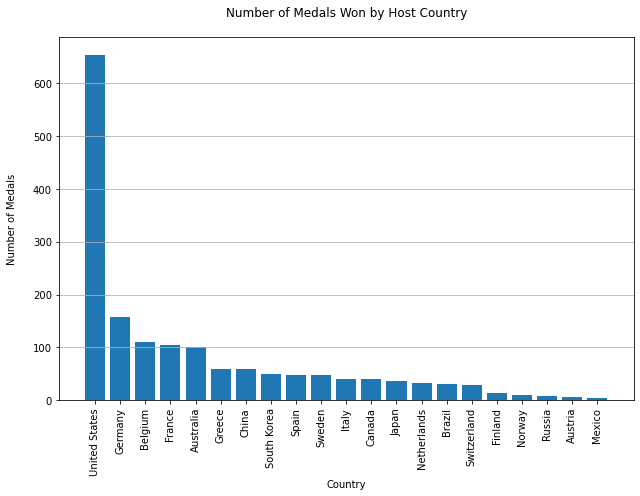

In [22]:
# plotting my results
plt.figure(figsize=(9,7))
plt.bar(medals_count.index, medals_count)
plt.xlabel('Country')
plt.ylabel('Number of Medals\n')
plt.title('Number of Medals Won by Host Country\n')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.grid(axis='y')

From the graph above, one can observe the huge range of difference in the medals won by USA and the rest of the countries. This could be due to the direct factors discussed above, such as exceptional sporting facilities and funding opportunities for athletes in the USA. Because of this range, I will be treating USA as an anomaly for further evaluations.


To visualize whether countries performed exceptionally well when they hosted the Olympics, I used the principles of data visualization and analysis. I plotted the medal count each year  for the top 9 countries and highlighted the years when they hosted the Summer Olympics. For future evaluations, I mainly used Summer Olympics as the participation in Summer vs Winter Olympics hugely varies, thus disrupting the visual understanding of graphs. 

The variable, <font color='darkblue'>country_list</font> is a Pandas dataseries that contains the names of the top 9 host countries. To avoid repetition in plotting each country's graph manually, I used a for loop. The for loop iterates through the indexes of country_list (which are the country names). Inside the loop, I use similar masking techniques along with .value_counts() to extract the number of medals each top country won for each year in the Summer Olympics. The conditions I used to create the mask included considering all athletes who have won at least 1 medal, the athletes whose team matches the current country in the for loop, and the athletes who competed in Summer Olympics. This information is stored in <font color='darkblue'>medals</font>. Furthermore, I use the .sort_index() method to arrange the medal count in an increasing order of years. This frequency would be the y-axis. 

Coming to the x-axis, I used masking to provide me a series of years when every respective country hosted the Olympics. Here, I checked the same conditions as with <font color='darkblue'>medals</font>, alongside checking if the athlete's team is the same as the host country. This series listed the years repeatedly for each athlete. To avoid repetition, I used the .drop_duplicates() method so as to obtain a series that contains each host year once. This series is stored under a variable name called <font color='darkblue'>year</font>. 

To plot the graph, I used my medals dataseries. To highlight my host years, I used another for loop that iterates through every element inside the variable, year. Then I used the .axvline() function of the matplotliib library so as to explicitly mark the host years of every represented country. 

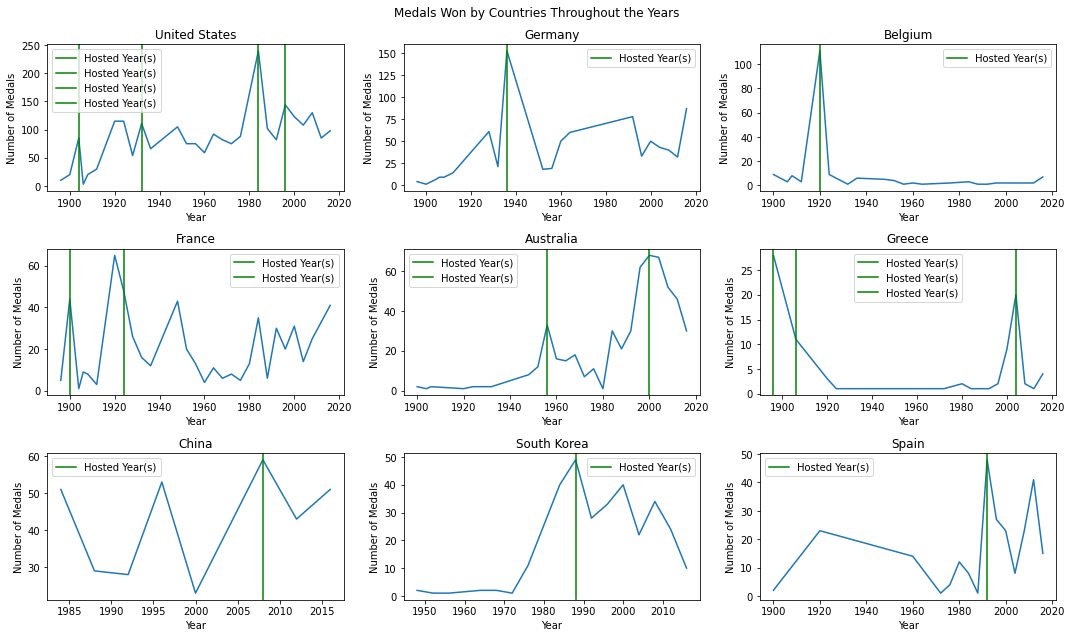

In [12]:
# calculating medals won by the other top 10 countries 
country_list = medals_count.iloc[0:9] # series of top 9 countries
plt.figure(figsize=(15,9))
x = 1
plt.suptitle('Medals Won by Countries Throughout the Years')
for i in country_list.index:
    plt.subplot(3,3,x)
    medals = all_ath[(all_ath.Medal.notnull()) & (all_ath.Team==i) & (all_ath.Season=='Summer')]['Year']
    medals = medals.value_counts().sort_index() # counts number of medal for each country each year
    
    year = all_ath[(all_ath.Medal.notnull()) & (all_ath.Team==i) & (all_ath.Season=='Summer') & (all_ath.Team==all_ath.Country)]['Year']
    year = year.drop_duplicates() # evaluating the years each country hosted the Olympics
    
    #plotting the results
    plt.plot(medals.index, medals)
    plt.xlabel('Year')
    plt.ylabel('Number of Medals')
    plt.title(i)
    for j in year:
        plt.axvline(x=j, label='Hosted Year(s)', color='green') # lists all the host years
    plt.legend()
    x+=1
plt.tight_layout()

#### 2.2 Gender Ratio Effect
To start off, I wanted to get a rough idea of how the participation of women vs men varied in the Summer Olympics. I plotted a graph that shows the number of male vs female participants, separately, throughout the years. To achieve this, I used masking and the .groupby() function combined with the .count() function. For masking, I first checked if the athlete is a male or a female using the Sex column in all_ath. Alongside, I checked if the athlete has participated in Summer or Winter Olympics. After obtaining my masked values, I grouped them together by year and counted the number of values in each year. This series was stored in a variable called <font color='darkblue'>all_men</font> for male participants and <font color='darkblue'>all_women</font> for female participants. Then I plotted both of these series on the same graph against the years, using the matplotlib library. 

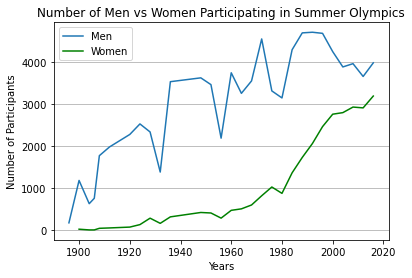

In [44]:
# evaluating the total number of male vs female participants at the Olympics
all_men = all_ath[(all_ath.Sex=='M') & (all_ath.Season=='Summer')].groupby('Year').count() # count of all male participants
all_women = all_ath[(all_ath.Sex=='F') & (all_ath.Season=='Summer')].groupby('Year').count() # count of all female participants

# plotting the results
plt.plot(all_men.index, all_men['Sex'], label='Men')
plt.plot(all_women.index, all_women['Sex'], 'g', label='Women')
plt.xlabel('Years')
plt.ylabel('Number of Participants')
plt.title('Number of Men vs Women Participating in Summer Olympics')
plt.legend()
plt.grid(axis='y')

As we can see in the graph above, the two lines representing the number of participants never touch. This indicates that the Olympics never had an equal number of participants in both the genders. The female participation had a significant growth after 1980s and the male participation increased and decreased rapidly throughout the decades. 

Next, I wanted to see how the plot above varies for the top countries. This would give us a rough idea of the amount of efforts put into encouraging women to participate in sports by the countries that win the most medals.  

I used masking to obtain a series of countries that won the most medals. This mask was stored in a variable called <font color='darkblue'>country_list</font>. The conditions used to compute the list included whether the athlete has won a medal and whether the country is United Kingdom. The UK was excluded as their team was scattered into various subdivisions across the earlier Olympic games, thus disrupting the data. I used .iloc[] method to obtain the top 6 entries from this series.

Similar to the graphs showcasing medals won by host countries throughout the years, I used a for loop to create 6 subplots showcasing the women to men participation ratio. Similar masking techniques were used along with .groupby() and .count() methods. I created two separate series, called <font color='darkblue'>men_cntry</font> and <font color='darkblue'>women_cntry</font>. The two of them stored the number of male and female participants for each country. I plotted my graphs inside the for loop itself, thus increasing the efficiency of my program. 

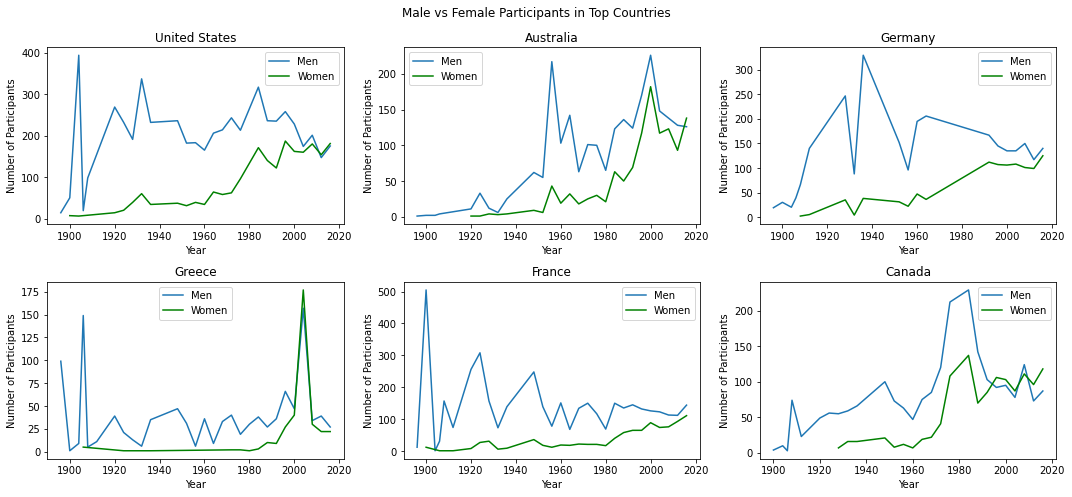

In [16]:
# evaluating how the ratio varies for top countries
country_list = all_ath[(all_ath.Medal.notnull()) & (all_ath.Country!='United Kingdom')]['Country']
country_list = country_list.value_counts().sort_values(ascending=False) # descending order of medal counts
country_list = country_list.iloc[:6] # top 6 countries

# plotting the results
plt.figure(figsize=(15,7))
x = 1
plt.suptitle('Male vs Female Participants in Top Countries')
for i in country_list.index:
    plt.subplot(2,3,x)
    men_cntry = all_ath[(all_ath.Team==i) & (all_ath.Sex=='M') & (all_ath.Season=='Summer')].groupby('Year').count()
    women_cntry = all_ath[(all_ath.Team==i) & (all_ath.Sex=='F') & (all_ath.Season=='Summer')].groupby('Year').count()
    plt.plot(men_cntry.index, men_cntry['Sex'], label='Men')
    plt.plot(women_cntry.index, women_cntry['Sex'], 'g', label='Women')
    plt.xlabel('Year')
    plt.ylabel('Number of Participants')
    plt.title(i)
    plt.legend()
    x+=1
plt.tight_layout()

Through the plots above, one can see the two lines showcasing the respective participation touching each other for several countries. This indicates that there have been instances when these countries sent an equal or greater amount of women than men to the Summer Olympics. Furthermore, it is interesting to note that almost every graph can been seen with a high peak. All the peaks correspond to the years when these countries hosted the Olympics, as it was easier to send in more athletes to one's own land. With the help of these graphs, it is clear that the countries which ensured a greater gender equality in Olympics participation won a greater amount of medals. 

The plots above give a very small picture of the gender participation compared to the entire pool of countries that take part in the Olympics. To have a better analysis of this topic, I computed the ratio of women vs men participants for all the countries that take part in the Summer games. The ratio was calculated by using the same variables, <font color='darkblue'>men_cntry</font> and <font color='darkblue'>women_cntry</font>. I then plotted my ratio against the number of medals won. Initially, I encountered an unexpected result. Most of my points on the graph were collected on one end, with a few minority scattered across the entire plot, taking up most of the space. These few points were the outliers, representing countries that either won 50+ medals or countries where the ratio was >1.5. This hindered the reading of the entire graph. To avoid this, I manually redefined the axes and plotted both the graphs (with and without the outliers). Furthermore, I marked the line where the ratio = 1.0, indicating an equal number of male vs female participants for a single team.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

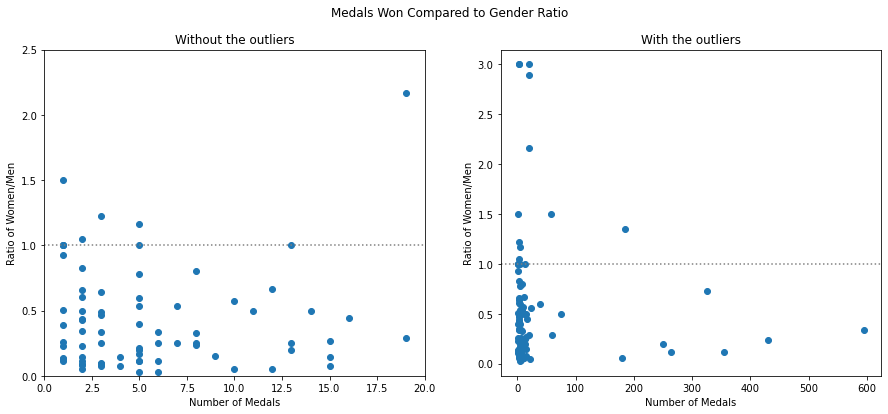

In [70]:
# calculating the total number of medals won per team
medals = all_ath[(all_ath.Medal.notnull()) & (all_ath.Season=='Summer')]['Team']
medals = medals.value_counts()

# calculating the ratio of women to men per team
men_cntry = all_ath[(all_ath.Medal.notnull()) & (all_ath.Sex=='M') & (all_ath.Season=='Summer')].groupby('Team').count()
women_cntry = all_ath[(all_ath.Medal.notnull()) & (all_ath.Sex=='F') & (all_ath.Season=='Summer')].groupby('Team').count()
ratio = women_cntry['ID']/men_cntry['ID']

# plotting the results
plt.figure(figsize=(15,6))
plt.suptitle('Medals Won Compared to Gender Ratio')
plt.subplot(1,2,1)
plt.scatter(medals, ratio)
plt.axhline(y=1, color='gray', linestyle=':')
plt.axis([0, 20, 0, 2.5]) # displaying without the outliers
plt.xlabel('Number of Medals')
plt.ylabel('Ratio of Women/Men')
plt.title('Without the outliers')

plt.subplot(1,2,2)
plt.scatter(medals, ratio)
plt.axhline(y=1, color='gray', linestyle=':')
plt.xlabel('Number of Medals')
plt.ylabel('Ratio of Women/Men')
plt.title('With the outliers')

plt.tight_layout

Here, a higher number of medals are being seen awarded to countries where the ratio < 1.0 (more male participants than female). This could be attributed to the fact that women started to play an important role in the Olympics decades after the games record collection began. The dataset plotted here does not take years into consideration, giving men a headstart on both the ratio and the medal count.

A better method of analyzing such a dataset would be to use the Gender Inequality Index of participating countries. The Gender Inequality Index (or GII, for short) measures the inequality between men and women for different countries on the basis of reproductive health, empowerment, and labour market. The analysis through this criteria involves the introduction of a new dataset which includes the GII values and rankings of various countries across the globe. I loaded in this dataset through a Pandas dataframe and named it <font color='darkblue'>gii</font>.  

In [17]:
# loading the data for Gender Inequality Index
gii = pd.read_excel(r'2020_Statistical_Annex_Table_5.xlsx', skiprows=6, usecols=("B:C"), names=['Country','Index Value'])

From the <font color='darkblue'>gii</font> dataset, I extracted the index values of the top 35 countries (excluding USA). This was achieved by redefining the variable, <font color='darkblue'>medals</font>, which includes a list of the top participating countries along with their medal counts. Using a for loop, I matched each country name in <font color='darkblue'>medals</font> to the ones in <font color='darkblue'>gii</font>. I then appended the GII values into a series called <font color='darkblue'>gii_value</font> in the same order as the country list.

In [91]:
# evaluating the GII for the top 35 countries at the Olympics
medals = all_ath[(all_ath.Medal.notnull()) & (all_ath.Season=='Summer')]['Team']
medals = medals.value_counts()
gii_country = medals.iloc[1:35] # excluding USA as it is an anomaly
gii_value=[]
for i in range(len(gii.iloc[:,0])):
    if gii.iloc[i,0] in gii_country:
        gii_value.append(gii.iloc[i,:])
gii_value = pd.DataFrame(gii_value) # contains series of GII value for top 35 countries
gii_country = pd.DataFrame(gii_country) # contains names of top 35 countries 

Moving forward, I plotted my GII index values against the number of medals won. I used the .axvline() function of the matplotlib library to split the dataset from GII = 0.1. 

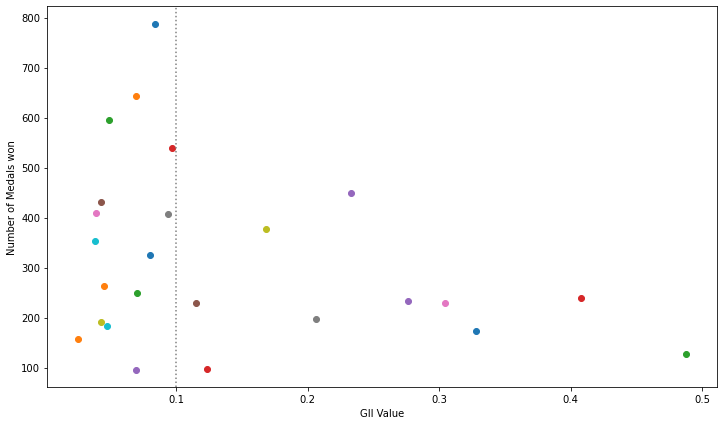

In [92]:
plt.figure(figsize=(12,7))

# sorting the medal data and GII data so that the indexes for each country match
for i in range(len(gii_country)):
    for j in range(len(gii_value)):
        if gii_value.iloc[j,0] == gii_country.index[i]:
            
            # plotting the results
            plt.scatter(gii_value.iloc[j,1], gii_country.iloc[i])
plt.xlabel('GII Value')
plt.ylabel('Number of Medals won')
plt.axvline(x=0.1, color='gray', linestyle=':') # splitting dataset for easier readability

#### 2.3 GDP Per Capita Effect
To answer my final question, I loaded in a dataset that contains the GDP per capita values for all the countries. I imported this information to a Pandas dataframe called <font color='darkblue'>gdp_pc</font>. I used the .dropna() method of Pandas to delete all the rows and columns with NaN values, so as to ease our analysis.

In [5]:
# loading in GDP per capita data
gdp_pc = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3358201.csv', skiprows=4, delimiter=',')
gdp_pc = gdp_pc.dropna(axis="columns", how="all") # drops empty columns
gdp_pc = gdp_pc.dropna() # drops empty rows
gdp_pc.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.836769,147.238537,156.426780,182.521139,162.594548,180.489043,...,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,...,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
13,Australia,AUS,GDP per capita (current US$),NY.GDP.PCAP.CD,1807.785710,1874.732106,1851.841851,1964.150470,2128.068355,2277.558398,...,62517.833747,68012.147901,68150.107041,62510.791171,56755.721712,49971.131456,54027.966818,57354.964046,55057.204696,51812.154037
14,Austria,AUT,GDP per capita (current US$),NY.GDP.PCAP.CD,935.460427,1031.815004,1087.834243,1167.000532,1269.412583,1374.532140,...,51374.958407,48567.695286,50716.708706,51717.495941,44178.047378,45276.831435,47309.366274,51453.147024,50121.554213,48327.631108
16,Burundi,BDI,GDP per capita (current US$),NY.GDP.PCAP.CD,70.051910,71.167188,73.435331,78.514621,86.161550,51.381881,...,249.577973,252.358866,256.975647,274.857842,305.549646,282.193028,292.998010,271.752496,261.245291,274.009523


Since the gdp_pc dataset contains values for all the countries across the globe, I wanted to filter out the countries that were relevant to the Summer Olympics. To do this, I used the <font color='darkblue'>medals</font> variable once again to filter out the countries whose names match the ones in <font color='darkblue'>medals</font>, using a for loop. My filtered dataframe is stored in a variable called <font color='darkblue'>gdp_pc_value</font>.

In [6]:
medals = all_ath[(all_ath.Medal.notnull()) & (all_ath.Season=='Summer')]['Team'] # participating countries at the Summer Olympics
medals = medals.value_counts()
gdp_pc_medals = medals.iloc[1:] # excluding USA
gdp_pc_value = []
for i in range(len(gdp_pc.iloc[:,0])):
    if gdp_pc.iloc[i,0] in gdp_pc_medals:
        gdp_pc_value.append(gdp_pc.iloc[i,:])

gdp_pc_value = pd.DataFrame(gdp_pc_value) # converting list to dataframe

I made use of graphs by plotting the medal count against the GDP per capita values. I further added a line of best fit to better support my claim. Considering the fact that gdp_pc_value has the GDP data of countries for each year, I wanted to compare this to the medal count of three distinct years. I chose the first year the olympics were held (1894), the last (2020), and the middle year (1956). I utilized three distinct lists that stored the GDP data of each country in these three years, and an additional list that stored the medal counts. 

To perform regression, I used the .polyfit() and .poly1d() functions provided in the Numpy library. I obtained a line of best fit for all three years and then made three subplots using the data and the fit. 

Functions

1894:  
0.1537 x + 22.67

1956:  
0.01201 x + 29.12

2020: 
0.002786 x + 51.78


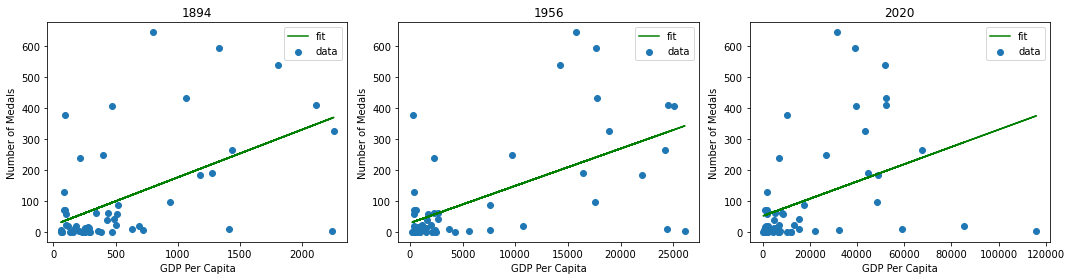

In [19]:
plt.figure(figsize=(15,4))
gdp_pc_value_start, gdp_pc_value_mid, gdp_pc_value_end, gdp_pc_medal_value = [], [], [], []

# sorting the medal data and GII data so that the indexes for each country match
for i in range(len(gdp_pc_medals)):
    for j in range(len(gdp_pc_value)):
        if gdp_pc_value.iloc[j,0] == gdp_pc_medals.index[i]:
            gdp_pc_value_start.append(gdp_pc_value.iloc[j,4]) # appending GDP data for 1894
            gdp_pc_value_mid.append(gdp_pc_value.iloc[j,32]) # appending GDP data for 1956
            gdp_pc_value_end.append(gdp_pc_value.iloc[j,64]) # appending GDP data for 2020
            gdp_pc_medal_value.append(gdp_pc_medals.iloc[i]) # medal count

# regression
start_parameters = np.polyfit(gdp_pc_value_start, gdp_pc_medal_value, 1)
mid_parameters = np.polyfit(gdp_pc_value_mid, gdp_pc_medal_value, 1)
end_parameters = np.polyfit(gdp_pc_value_end, gdp_pc_medal_value, 1)

start_func = np.poly1d(start_parameters)
mid_func = np.poly1d(mid_parameters)
end_func = np.poly1d(end_parameters)
print('Functions\n')
print('1894: ' + str(start_func) + '\n\n1956: ' + str(mid_func) + '\n\n2020:' + str(end_func))

# plotting the results
plt.subplot(1,3,1)
plt.scatter(gdp_pc_value_start, gdp_pc_medal_value, label='data')
plt.plot(gdp_pc_value_start, start_func(gdp_pc_value_start), 'g', label='fit')
plt.title('1894')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Medals')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(gdp_pc_value_mid, gdp_pc_medal_value, label='data')
plt.plot(gdp_pc_value_mid, mid_func(gdp_pc_value_mid), 'g', label='fit')
plt.title('1956')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Medals')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(gdp_pc_value_end, gdp_pc_medal_value, label='data')
plt.plot(gdp_pc_value_end, end_func(gdp_pc_value_end), 'g', label='fit')
plt.title('2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Medals')
plt.legend()

plt.tight_layout()

The plot above shows some positive correlation through the line of best fit, although it is not steep. They are almost the same for all the three plots, but somewhat different as determined by the polyfit functions. These graphs still don't provide an exact picture of how the medal count varies with an increasing GDP per capita. To evaluate this, I plotted the GDP per capita and Medal count value for three specific countries throughout the years. 

The three countries I chose for this evaluation include China and Greece. China is known for its GDP boom, which is why I chose it as my first preference. Greece is an economically rich country, so it coud be helpful to view it in comparison to China. 

To evaluate China's records, I used masking to obtain the number of medals China won. It is important to note that the GDP per capita record collection began from the year 1960. Because of this, I specified a condition in the mask which included considering all athletes who competed on or after 1960. I grouped this number using the .groupby() function using the Year column, and counted the medals in each year using the .count() function. I stored this series in a variable named <font color='darkblue'>chn_medals</font>. To evaluate the GDP per capita values for China, I reused the <font color='darkblue'>gdp_pc_value</font> variable, and extracted the values using a for loop. Then, I plotted both my obtained series on the same graph. To ease readability, I used 2 x-axes and y-axes each usng the .twinx() and .twiny() functions of the matplotlib library. 

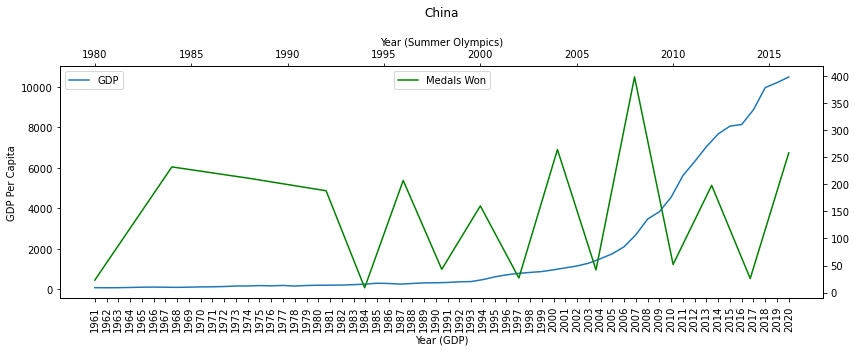

In [58]:
chn_medals = all_ath[(all_ath.Team=='China') & (all_ath.Year>=1960)].groupby('Year').count() # China medal count

chn_gdp_pc_val = []

for i in range(len(gdp_pc_value)):
    if gdp_pc_value.iloc[i,0]=='China':
        chn_gdp_pc_val.append(gdp_pc_value.iloc[i, 5:]) # China GDP per capita value for each year

fig, ax1 = plt.subplots()
plt.title('China\n')
plt.plot(chn_gdp_pc_val[0].index, chn_gdp_pc_val[0], label='GDP') # plotting GDP per capita
plt.legend(loc='upper left')
plt.xlabel('Year (GDP)')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=90)
ax2 = ax1.twinx().twiny()
plt.plot(chn_medals.index, chn_medals['ID'], 'g', label='Medals Won') # plotting number of medals won
plt.legend(loc='upper center')
plt.ylabel('Number of Medals')
plt.xlabel('Year (Summer Olympics)')
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()

I followed the same methodology for my Greece graph.

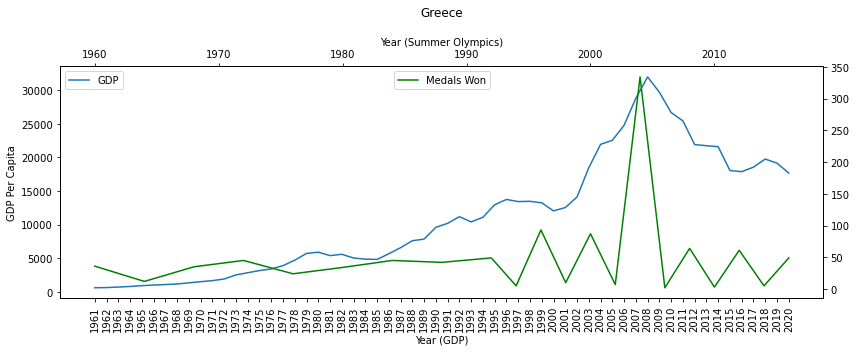

In [57]:
grc_medals = all_ath[(all_ath.Team=='Greece') & (all_ath.Year>=1960)].groupby('Year').count() # Greece medal count

grc_gdp_pc_val = []

for i in range(len(gdp_pc_value)):
    if gdp_pc_value.iloc[i,0]=='Greece':
        grc_gdp_pc_val.append(gdp_pc_value.iloc[i, 5:]) # Greece GDP per capita value for each year

fig, ax1 = plt.subplots()
plt.title('Greece\n')
plt.plot(grc_gdp_pc_val[0].index, grc_gdp_pc_val[0], label='GDP') # plotting GDP per capita
plt.legend(loc='upper left')
plt.xlabel('Year (GDP)')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=90)
ax2 = ax1.twinx().twiny()
plt.plot(grc_medals.index, grc_medals['ID'], 'g', label='Medals Won') # plotting number of medals won
plt.legend(loc='upper center')
plt.ylabel('Number of Medals')
plt.xlabel('Year (Summer Olympics)')
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()

### 3.0 Results

#### 3.1 Host Country Effect

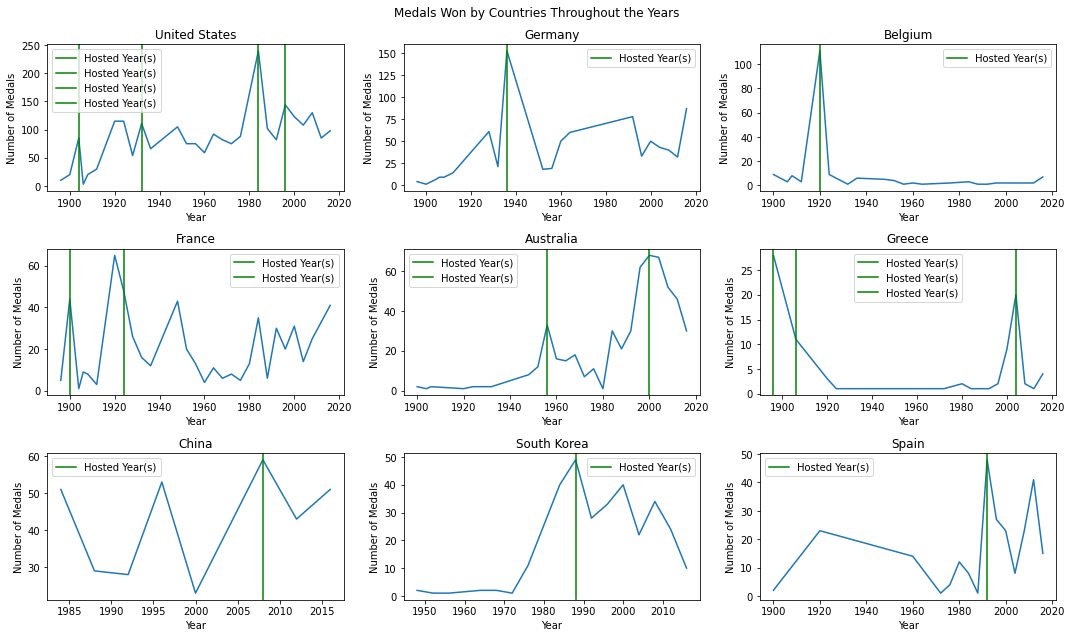

In [43]:
country_list = medals_count.iloc[0:9]
plt.figure(figsize=(15,9))
x = 1
plt.suptitle('Medals Won by Countries Throughout the Years')
for i in country_list.index:
    plt.subplot(3,3,x)
    medals = all_ath[(all_ath.Medal.notnull()) & (all_ath.Team==i) & (all_ath.Season=='Summer')]['Year']
    medals = medals.value_counts().sort_index()
    
    year = all_ath[(all_ath.Medal.notnull()) & (all_ath.Team==i) & (all_ath.Season=='Summer') & (all_ath.Team==all_ath.Country)]['Year']
    year = year.drop_duplicates() # evaluating the years each country hosted the Olympics
    
    #plotting the results
    plt.plot(medals.index, medals)
    plt.xlabel('Year')
    plt.ylabel('Number of Medals')
    plt.title(i)
    for j in year:
        plt.axvline(x=j, label='Hosted Year(s)', color='green')
    plt.legend()
    x+=1
plt.tight_layout()

The graph above shows the medals won by the top 9 countries throughout the years. For the majority of the countries shown, the Hosted Year(s) line always corresponds to a peak in the graph that represents the number of medals won.

#### 3.2 Gender Ratio Effect

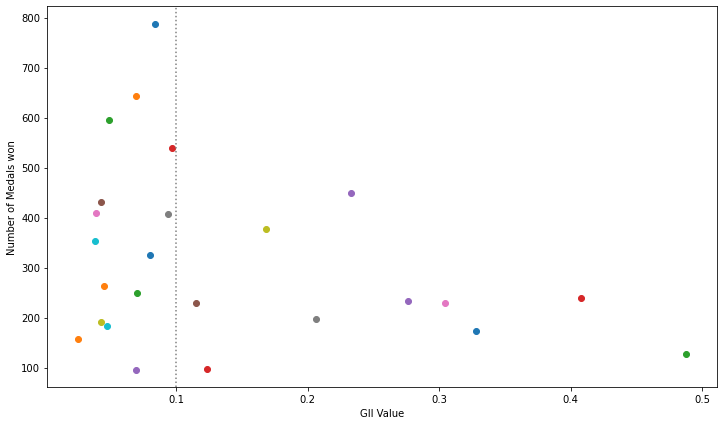

In [47]:
plt.figure(figsize=(12,7))

for i in range(len(gii_country)):
    for j in range(len(gii_value)):
        if gii_value.iloc[j,0] == gii_country.index[i]:
            
            plt.scatter(gii_value.iloc[j,1], gii_country.iloc[i])
plt.xlabel('GII Value')
plt.ylabel('Number of Medals won')
plt.axvline(x=0.1, color='gray', linestyle=':')

The graph above shows the number of medals won compared to the Gender Inequality Index values of the countries that participate in the Olympics. A lower GII value indicates more equality among men and women in a country. From the scatterplot above, it can be observed that there is a vast difference among the positions of the dots before and after the GII value of 0.1. To aid in the visual understanding of this plot, I split the data from this point. 

#### 3.3 GDP Per Capita Effect
##### China

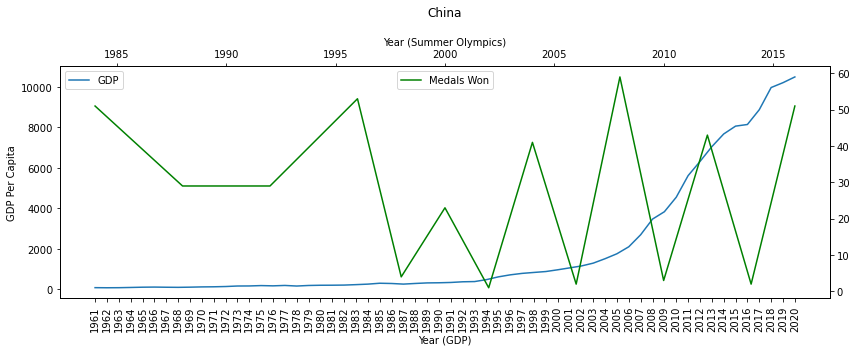

In [65]:
chn_medals = all_ath[(all_ath.Medal.notnull()) & (all_ath.Team=='China') & (all_ath.Year>=1960)].groupby('Year').count()

chn_gdp_pc_val = []

for i in range(len(gdp_pc_value)):
    if gdp_pc_value.iloc[i,0]=='China':
        chn_gdp_pc_val.append(gdp_pc_value.iloc[i, 5:])

fig, ax1 = plt.subplots()
plt.title('China\n')
plt.plot(chn_gdp_pc_val[0].index, chn_gdp_pc_val[0], label='GDP')
plt.legend(loc='upper left')
plt.xlabel('Year (GDP)')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=90)
ax2 = ax1.twinx().twiny()
plt.plot(chn_medals.index, chn_medals['ID'], 'g', label='Medals Won')
plt.legend(loc='upper center')
plt.ylabel('Number of Medals')
plt.xlabel('Year (Summer Olympics)')
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()

The highest peak in China's medal count does not correspond to a peak in the GDP per capita plot. 

##### Greece

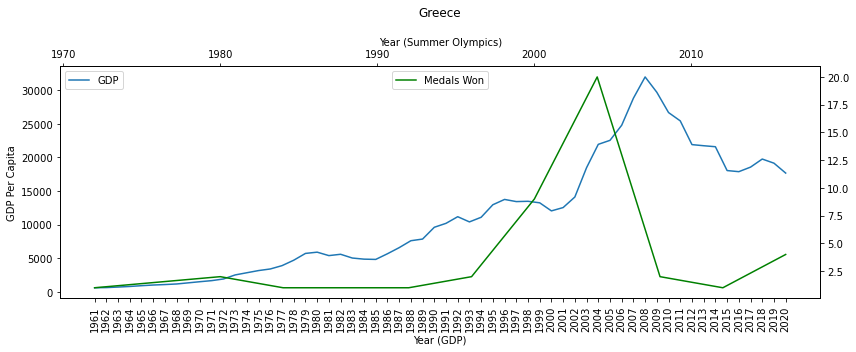

In [66]:
grc_medals = all_ath[(all_ath.Medal.notnull()) & (all_ath.Team=='Greece') & (all_ath.Year>=1960)].groupby('Year').count()

grc_gdp_pc_val = []

for i in range(len(gdp_pc_value)):
    if gdp_pc_value.iloc[i,0]=='Greece':
        grc_gdp_pc_val.append(gdp_pc_value.iloc[i, 5:])

fig, ax1 = plt.subplots()
plt.title('Greece\n')
plt.plot(grc_gdp_pc_val[0].index, grc_gdp_pc_val[0], label='GDP')
plt.legend(loc='upper left')
plt.xlabel('Year (GDP)')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=90)
ax2 = ax1.twinx().twiny()
plt.plot(grc_medals.index, grc_medals['ID'], 'g', label='Medals Won')
plt.legend(loc='upper center')
plt.ylabel('Number of Medals')
plt.xlabel('Year (Summer Olympics)')
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()

In the graph above, I see some relation between the GDP and the number of medals won. There is a distinct peak in the number of medals won, which is quite close to the peak in the GDP per capita value. 

### 4.0 Discussion

#### 4.1 Observations 
For my host country effect, I observed a consistent pattern for a majority of the countries on the graph. A peak in the graph can be observed for most of the countries on its host year(s). This concludes to a country winning more medals when they host the Olympics, compared to the years around the host year. Such a conclusion proves a positive correlation with the fact that hosting the Olympics can make a country more successful.

Coming to my gender ratio effect, I noticed that the countries with more medals were placed on one end of the graph. So, countries on the left side of the graph, with GII < 0.1, have won a huge range of medals compared to the countries with GII > 0.1. This shows that countries which ensure that men and women are given the same opportunities have a higher chance of winning big at the Olympics. Countries as such, which have a well defined welfare system for the empowerment of women tend to send an equal number of male and female participants at the Olympics, as seen by the participants graphs for top countries in the methods section. This further supports my claim that sending an equal number of male and female athletes to the Olympics plays with a country's odds.

Lastly, I will discuss my GDP per capita effect. From the graph representing China above, I do not notice any pattern among the rising GDP and the medals won. The peaks in either of the plots do not correspond to the same year, thus concluding that there is not much relation between the two. Secondly, a slight correlation can be seen in the graph representing Greece. However, the peak in the medal count is due to the fact that Greece hosted the 2004 Olympics (supporting the host year effect), which led them to grow their economy in the later years. From both these plots, I can conclude that a country's GDP per capita (and therefore, its economic status) does not play a huge role in their success at the games.

#### 4.2 Obstacles
The biggest obstacle I encountered was the size of my <font color='darkblue'>all_ath</font> dataset. The vast amount of information contained in this dataframe made it difficult for the masking process to be entirely foolproof. Following this, every value on most graphs is not entirely accurate, but they provide a good estimate of the actual values. Moreover, the estimates are relative to each other. This means that even if all the values were accurate, the patterns observed in the graphs would still remain the same. This obstacle does not necessarily hinder the data analysis procedure.

In my final two plots for GDP per capita effect, I could not figure out why one of the axes labels was not visible and why there were two separate legends.

### 5.0 Conclusion
To conclude my findings of this project, I will directly answer the questions that I proposed in section 1.0:
1. Yes, there is a homefield advantage observed by various host countries as proven by the peaks in the medals vs years graph for the top countries.
2. Yes, a country that ensures equal opportunities for both men and women gains more medals at the Olympics. This is proven by the GII vs medal count graph.
3. No, the GDP per capita does not dictate over a country's chances of winning more medals at the Olympics.

### 6.0 References

#### 6.1 Datasets Used
1. Rgriffin (2018, June 15). 120 Years of Olympic History: Athletes and Results. Kaggle. Retrieved November 20, 2021, from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results. 

2. Petro (2021, October 21). Olympic Games, 1986-2021. Kaggle. Retrieved November 20, 2021, from https://www.kaggle.com/piterfm/olympic-games-medals-19862018?select=olympic_hosts.csv. 

3. HDR. Human Development Reports - Gender Inequality Index. Retrieved December 6, 2021, from http://hdr.undp.org/en/file/2020statisticalannextable5xlsx. 

4. World Bank. GDP per capita (current USD). Data. Retrieved December 6, 2021, from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

#### 6.2 Code Used
1. Joshuaswords (2021, August 12). Does hosting the Olympics improve performance? Kaggle. Retrieved November 22, 2021, from https://www.kaggle.com/joshuaswords/does-hosting-the-olympics-improve-performance. 